---
---

**PSTB Bootcamp - Hackathon 1 - Subject 3**: *Exploring Employee Attrition and Performance in a Corporate Environment (IBM HR Analytics)*


---


**Date** : 23/10/2025


---


**Team**: YC Dynamics (Yacine Fares, Clément Philbert)

---
---

# A) Introduction

# B ) Data Loading and Preprocessing

## 1. Downloading the IBM HR Analytics dataset and extracting the CSV

In [ ]:
## Downloading the IBM HR Analytics dataset using the requests module (version 2.32.5)

# Importing the requests library
import requests
url = 'https://github.com/devtlv/Datasets-DA-Bootcamp-2-/raw/refs/heads/main/Week%208%20-%20Hackathon%20&%20AB%20Testing/W8D1%20-%20Hackathon/IBM%20HR%20Analytics%20Employee%20Attrition%20&%20Performance.zip'

response = requests.get(url)
file_Path = 'IBM_HR_Analytics_Employee_Attrition_Performance.zip'

if response.status_code == 200:
    with open(file_Path, 'wb') as file:
        file.write(response.content)
    print('File downloaded successfully')
else:
    print('Failed to download file')

File downloaded successfully


In [ ]:
## Extracting the IBM HR Analytics csv file from the archive and moving it to a "dataset" folder using
## the zipfile and os modules (dropping unnecessary folder cascading from the zip).

# Importing libraries
import zipfile
import os

zip_path = "IBM_HR_Analytics_Employee_Attrition_Performance.zip"
file_to_extract = "IBM HR Analytics Employee Attrition & Performance/IBM HR Analytics Employee Attrition & Performance/WA_Fn-UseC_-HR-Employee-Attrition.csv"   # the exact internal path
output_dir = "dataset"

# Making sure the output folder exists
os.makedirs(output_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    with zip_ref.open(file_to_extract) as source_file:
        # Get only the filename (drop folders)
        filename = os.path.basename(file_to_extract)
        output_path = os.path.join(output_dir, filename)

        # Write file contents
        with open(output_path, 'wb') as target_file:
            target_file.write(source_file.read())

print(f"Extracted {file_to_extract} → {output_path}")

Extracted IBM HR Analytics Employee Attrition & Performance/IBM HR Analytics Employee Attrition & Performance/WA_Fn-UseC_-HR-Employee-Attrition.csv → dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


## 2. Loading the csv dataset into a dataframe with pandas

In [ ]:
## Loading the IBM HR Analytics dataset in a dataframe

# Importing the pandas library
import pandas as pd

# Creating the dataframe from the csv
df = pd.read_csv("dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

## 3. Initial high-level data exploration

In [ ]:
# Checking first five entries of the dataset with .head()
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Checking structure and datatypes with .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

> 👉 The dataset has 1470 entries and 35 columns

> 👉 Data transformation we could perform down the line:

| Columns currently int64                                                                                                                                                                                                | Current dtype | Suggested dtype                                | Reason                                                                                                              |
| -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------- | ---------------------------------------------- | ------------------------------------------------------------------------------------------------------------------- |
| `Age`                                                                                                                                                                                                    | int64         | ✅ keep as int64                                | Continuous numeric variable.                                                                                        |
| `DailyRate`, `HourlyRate`, `MonthlyIncome`, `MonthlyRate`                                                                                                                                                | int64         | ✅ keep as int64                                | Continuous numeric values.                                                                                          |
| `DistanceFromHome`, `PercentSalaryHike`, `YearsAtCompany`, `YearsInCurrentRole`, etc.                                                                                                                    | int64         | ✅ keep as int64                                | Continuous or count-based — fine as numeric.                                                                        |
| `Education`, `EnvironmentSatisfaction`, `JobInvolvement`, `JobLevel`, `JobSatisfaction`, `PerformanceRating`, `RelationshipSatisfaction`, `StockOptionLevel`, `TrainingTimesLastYear`, `WorkLifeBalance` | int64         | ⚠️ **convert to categorical (pd.Categorical)** | These are *ordinal* variables — coded as 1–4 or 1–5. Converting to categorical helps with readability and analysis. |
| `EmployeeCount`, `StandardHours`                                                                                                                                                                         | int64         | ⚠️ **drop or convert to constant**             | Usually constant across all rows (e.g., 1 or 80). They add no value — verify and drop if true.                      |
| `EmployeeNumber`                                                                                                                                                                                         | int64         | ⚠️ **treat as object/string (ID)**             | It’s an identifier, not numeric data — shouldn’t be used in math.                                                   |


| Columns currently object                                                                                             | Current dtype | Suggested dtype                       | Reason                                                                          |
| -------------------------------------------------------------------------------------------------- | ------------- | ------------------------------------- | ------------------------------------------------------------------------------- |
| `Attrition`                                                                                        | object        | ⚠️ **convert to boolean or category** | Typically “Yes” / “No”. Convert with `map({'Yes': 1, 'No': 0})` or to category. |
| `BusinessTravel`, `Department`, `EducationField`, `Gender`, `JobRole`, `MaritalStatus`, `OverTime` | object        | ⚠️ **convert to categorical**         | Nominal categorical variables — better memory and efficiency.                   |
| `Over18`                                                                                           | object        | ⚠️ **drop or set as constant**        | Usually all "Y". If so, drop (no information value).                            |


## 4. Looking for missing values or duplicates

In [ ]:
# Looking for potential missing values in the dataframe (returning the sum of null values per column)
print(df.isnull().sum())
print(f"\n\nNumber of missing data in datateset: ", df.isnull().sum().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

> 👉 There are no missing values in the dataset

In [ ]:
# Looking for potential duplicates in the dataframe (returning the count as an integer)
df.duplicated().sum()

np.int64(0)

> 👉 There are no duplicates in the dataset (returned value is 0)

In [ ]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

print("\nNumerical variables :", len(num_cols))
print(num_cols)

print("\nCategorical variables :", len(cat_cols))
print(cat_cols)


Numerical variables : 26
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Categorical variables : 9
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [ ]:
for c in cat_cols:
    bad = pd.to_numeric(df[c]
                        .astype(str)
                        .str.replace(',', '.', regex=False)
                        .str.strip(), errors='coerce').isna()

## 5. Converting and cleaning the dataset before analysis

Dropping irrelevant columns

In [ ]:
df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], inplace=True)

Verifying that the drop columns worked

In [ ]:
df.shape

(1470, 31)

In [ ]:
# Encoding categorial columns to simplify comparisons
#df['MaritalStatus'] = df['MaritalStatus'].map({"Single" : 0, "Married" : 1, "Divorced" : 2})
#df['OverTime'] = df['OverTime'].map({"No" : 0, "Yes" : 1})
#df['Gender'] = df['Gender'].map({"Female" : 0, "Male" : 1})
#df['Attrition'] = df['Attrition'].map({"No" : 0, "Yes" : 1})

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


## 6. Key conclusions

# C ) Exploratory Data Analysis (EDA)

In [ ]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## a. Generating a statistical summary of numerical columns

In [ ]:
# Using the describe method on dataframe to calculate statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### **key findings from the table**:

| Infos        | Age                | Distance From Home | Years at company | Years In Current Role | Years Since Last Promotion | Years With Current Manager |
|--------------|--------------------|--------------------|------------------|-----------------------|----------------------------|----------------------------|
| Average      | 37 years old       | 9 km               | 7 years          | 4.2                   | 2.2                        | 4.1                        |
| Over 75 %    | above 43 years old | 14 km away         | 9 years          | 7                     | 3                          | 7                          |
| Oldest / Max | 60 years old       | 29 km              | 40 years         | 18                    | 15                         | 17                         |

## b. Data Distribution Analysis

### Distribution of Numeric Variables

<Figure size 1500x1200 with 0 Axes>

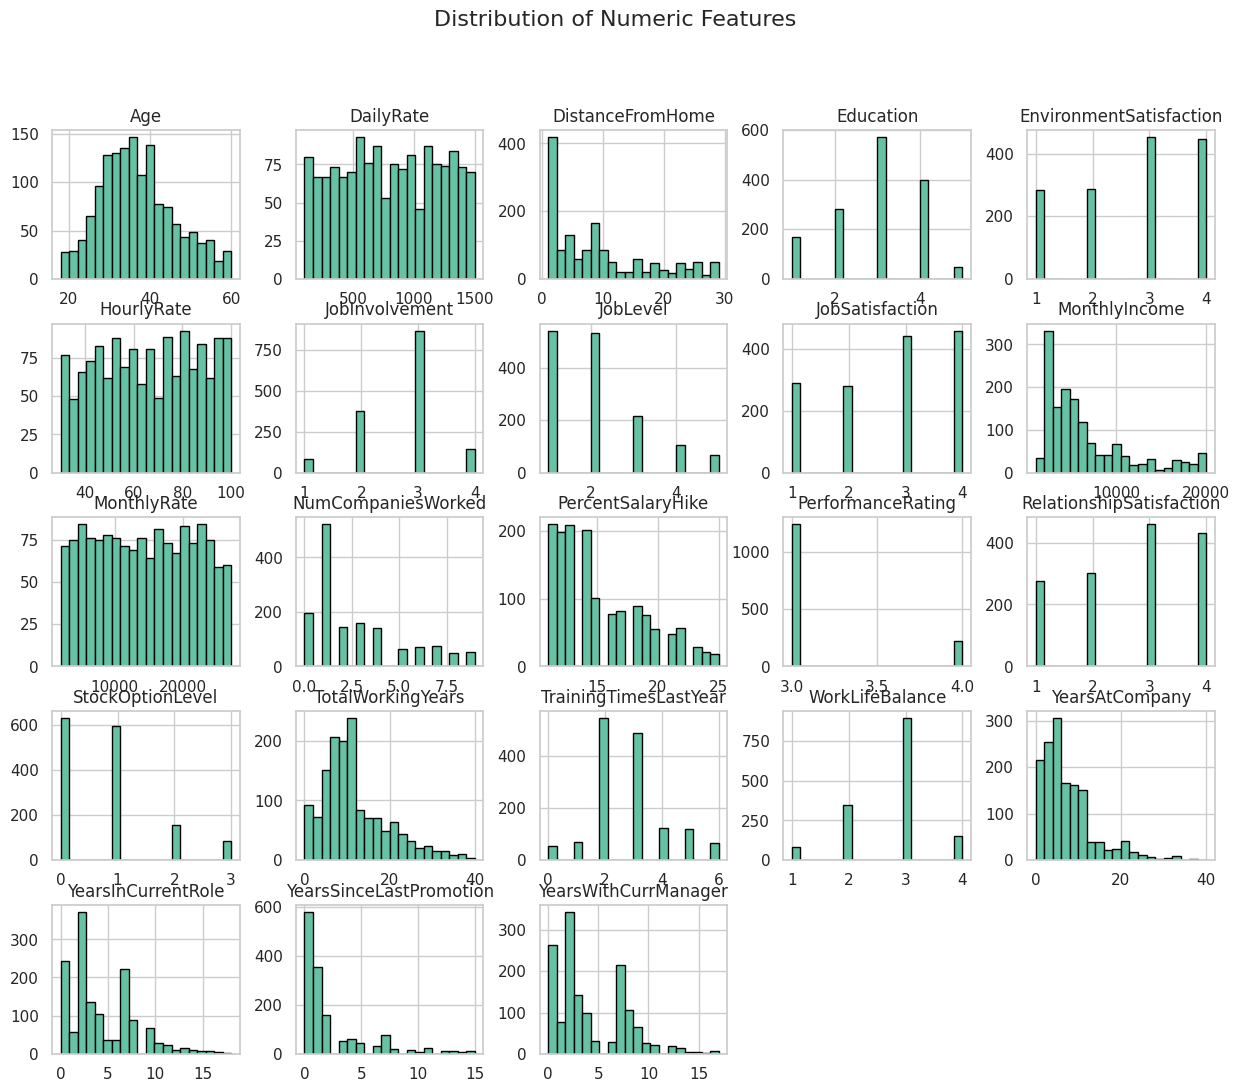

In [ ]:
# Visualize numeric distributions
numeric_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 12))
df[numeric_cols].hist(bins=20, figsize=(15, 12), edgecolor='black')
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.show()

✅ Purpose: Identify skewness, outliers, and patterns in numeric variables.

### Correlation Heatmap (to identify key relationships)

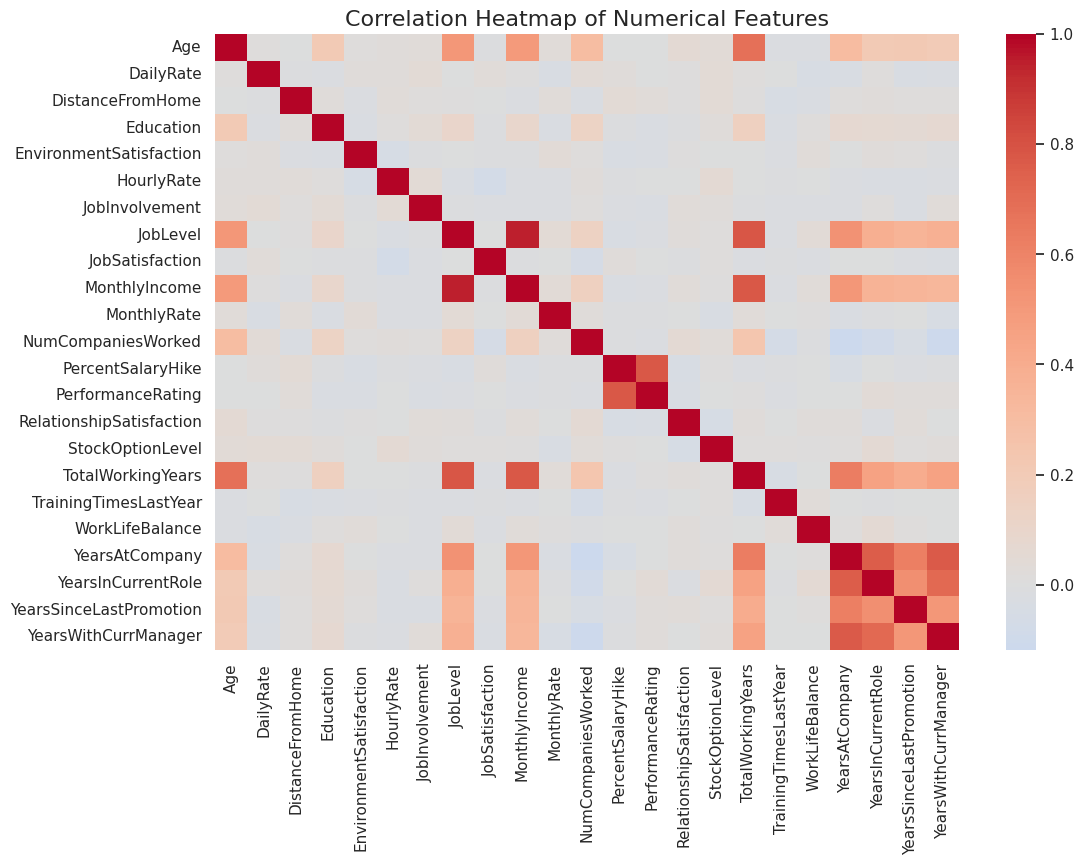

In [ ]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

> 👉 **Interpretation**: YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and YearsWithCurrManager are strongly correlated between each other.

> It is interesting to note that YearsAtCompany is highly correlated with YearsWithCurrManager which could be an indication that stability in employee management can create retention.

## c. Attrition Overview and Basic Trend

Attrition
No     1233
Yes     237
Name: count, dtype: int64
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


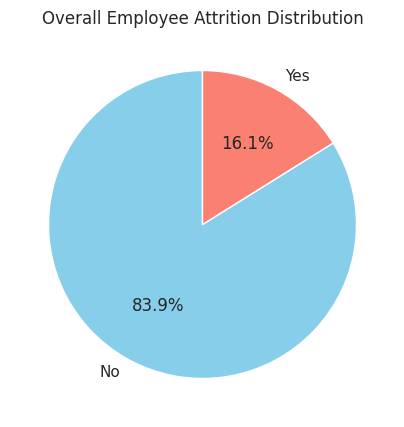

In [ ]:
# Count and percentage
attr_counts = df['Attrition'].value_counts()
attr_percent = df['Attrition'].value_counts(normalize=True) * 100

print(attr_counts)
print(attr_percent)

# Pie chart for quick visualization
plt.figure(figsize=(5,5))
plt.pie(attr_counts, labels=attr_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title("Overall Employee Attrition Distribution")
plt.show()


> 👉 **Insight**: 16 % of employees have left the company

## d. Attrition by Demographic and Job Variables

### Age Distribution by Attrition

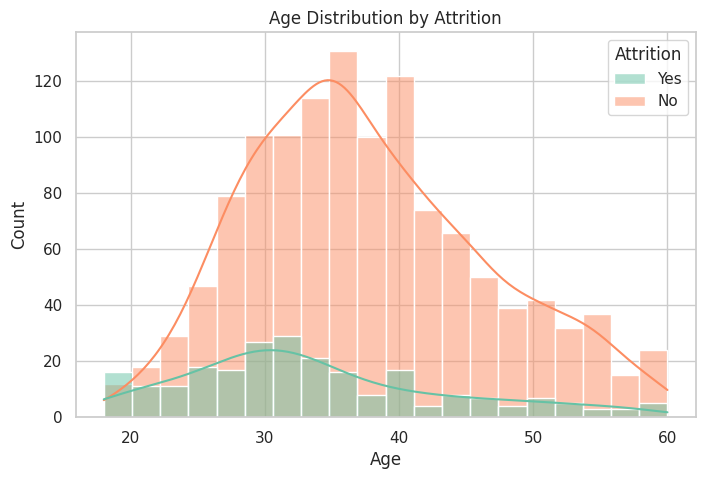

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Attrition', kde=True, bins=20)
plt.title("Age Distribution by Attrition")
plt.show()

> 👉 **Insight**: Younger employees typically have higher attrition.

### Attrition by Gender

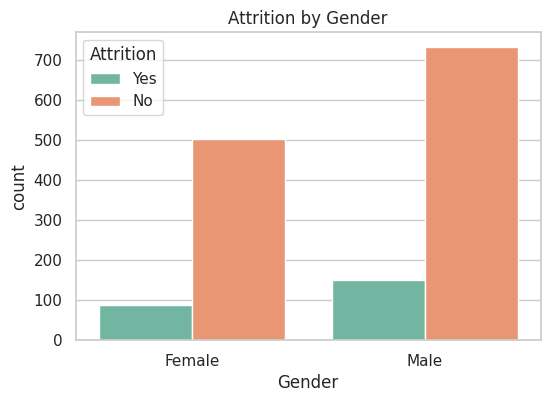

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', hue='Attrition')
plt.title("Attrition by Gender")
plt.show()

> 👉 **Insight**: Male attrition is slightly higher.

### Attrition by Education Level

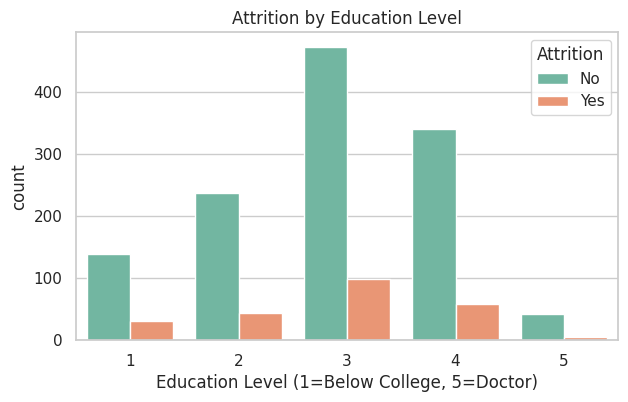

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Education', hue='Attrition')
plt.title("Attrition by Education Level")
plt.xlabel("Education Level (1=Below College, 5=Doctor)")
plt.show()

> 👉 **Insight**: Attrition can vary across education levels (mid-levels tend to show higher turnover).

### Attrition by Job Role

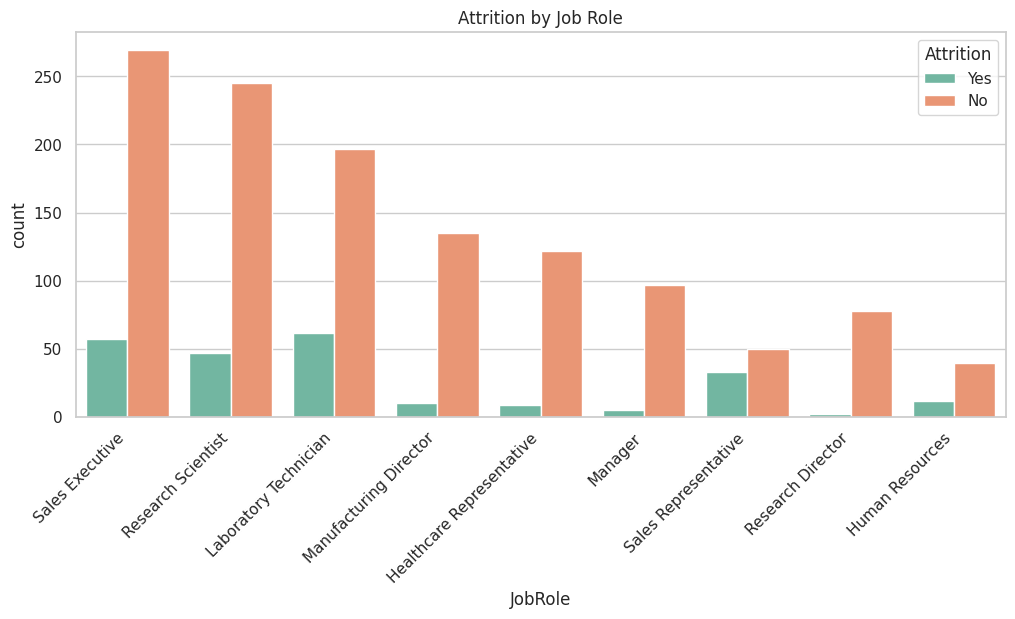

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='JobRole', hue='Attrition')
plt.title("Attrition by Job Role")
plt.xticks(rotation=45, ha='right')
plt.show()

> 👉 **Insight**: Sales Executive, Sales Representatives, Research Scientist and Laboratory Technicians roles have the higher attrition across all company roles.

### Attrition by Department

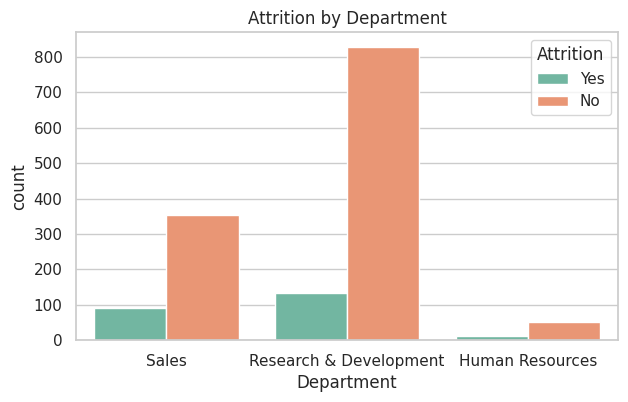

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title("Attrition by Department")
plt.show()

> 👉 **Insight**: As the previous visualisation showed, Sales and Research departments are the most impacted by attrition but the R&D Department has the highest attrition rate

## e. Satisfaction and Work-Life Balance Analysis

### Job Satisfaction vs Attrition

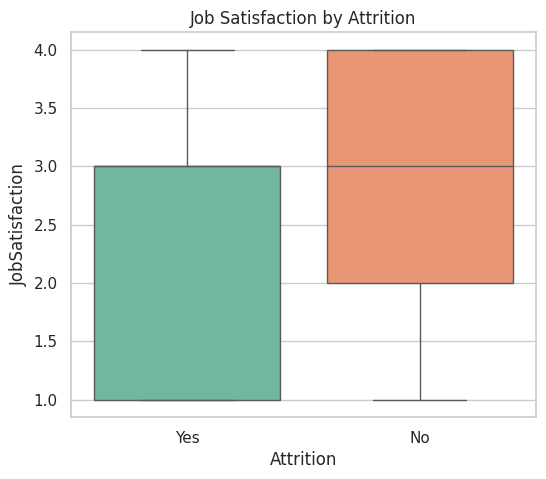

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='Attrition', y='JobSatisfaction', hue='Attrition',legend=False, palette='Set2')
plt.title("Job Satisfaction by Attrition")
plt.show()

> 👉 **Interpretation**: Lower satisfaction levels correlate with higher attrition.

### Environment Satisfaction vs Attrition

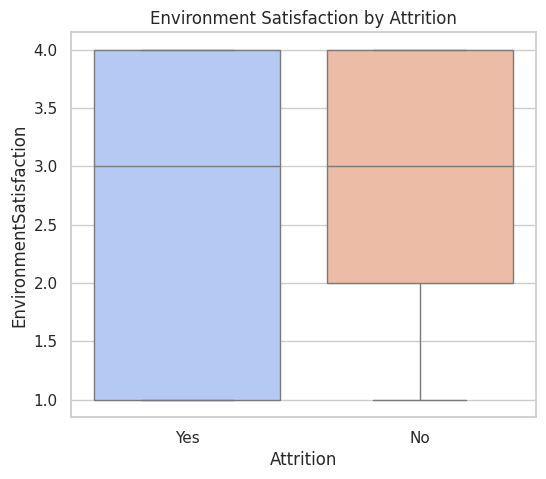

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='Attrition', y='EnvironmentSatisfaction',hue='Attrition',legend=False, palette='coolwarm')
plt.title("Environment Satisfaction by Attrition")
plt.show()

### Work-Life Balance vs Attrition

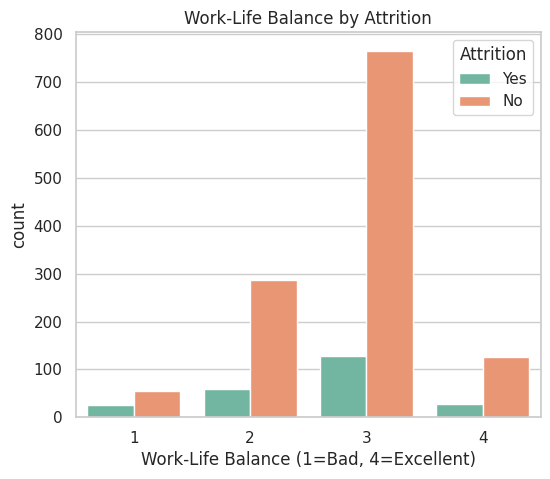

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='WorkLifeBalance', hue='Attrition')
plt.title("Work-Life Balance by Attrition")
plt.xlabel("Work-Life Balance (1=Bad, 4=Excellent)")
plt.show()

> 👉 **Interpretation**: Employees with poor work-life balance tend to leave more frequently.

## **f. KEYS FINDINGS (EDA)**

- Overall attrition rate is 16% > high attrition rate if we compare it to the average employee turnover across all industries in the United States which is 3.3% (U.S. Bureau of Labor Statistics, January 2025).

- Younger and lower-tenure employees are more likely to leave.

- Job role and department have strong effects — Sales and Lab Tech roles show higher turnover.

- Low satisfaction (Job and Environment) correlates strongly with attrition.

- Poor work-life balance increases attrition risk.


- **Observed trend:** Employees who work overtime, earn lower salaries, or live farther from work tend to have higher attrition rates.  
- **Strong negative correlations:** MonthlyIncome, Age, YearsAtCompany.  
- **Positive correlations:** DistanceFromHome, OverTime.

# D ) Correlation and Trend Analysis

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="Set2")

This section explores how employee attributes relate to attrition and performance.
We will:
1. Analyze attrition rates by Education, JobSatisfaction, and WorkLifeBalance.
2. Observe performance trends across departments and job roles.
3. Build cross-tabulations and heatmaps to visualize multi-variable relationships such as:
   - DistanceFromHome × JobRole × Attrition
   - MonthlyIncome × Education × Attrition


## 1. Analyzing attrition rates by Education, JobSatisfaction, and WorkLifeBalance.

In [ ]:
df['Attrition'] = df['Attrition'].replace({'Yes': 1, 'No': 0}).astype(int)

/tmp/ipython-input-1915115092.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Attrition'] = df['Attrition'].replace({'Yes': 1, 'No': 0}).astype(int)


Average attrition rate by Education:


,Attrition
Education,
1,0.182
2,0.156
3,0.173
4,0.146
5,0.104


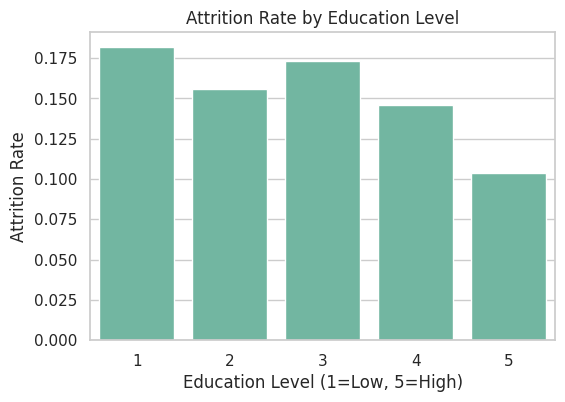

In [ ]:
# --- Education ---
edu_attr = df.groupby("Education")["Attrition"].mean().round(3)
print("Average attrition rate by Education:")
display(edu_attr)

plt.figure(figsize=(6,4))
sns.barplot(x=edu_attr.index, y=edu_attr.values)
plt.title("Attrition Rate by Education Level")
plt.xlabel("Education Level (1=Low, 5=High)")
plt.ylabel("Attrition Rate")
plt.show()


Average attrition rate by JobSatisfaction:


,Attrition
JobSatisfaction,
1,0.228
2,0.164
3,0.165
4,0.113


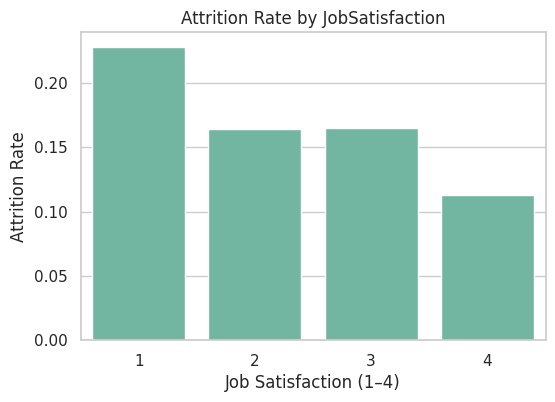

In [ ]:
# --- JobSatisfaction ---
js_attr = df.groupby("JobSatisfaction")["Attrition"].mean().round(3)
print("\nAverage attrition rate by JobSatisfaction:")
display(js_attr)

plt.figure(figsize=(6,4))
sns.barplot(x=js_attr.index, y=js_attr.values)
plt.title("Attrition Rate by JobSatisfaction")
plt.xlabel("Job Satisfaction (1–4)")
plt.ylabel("Attrition Rate")
plt.show()


Average attrition rate by WorkLifeBalance:


,Attrition
WorkLifeBalance,
1,0.312
2,0.169
3,0.142
4,0.176


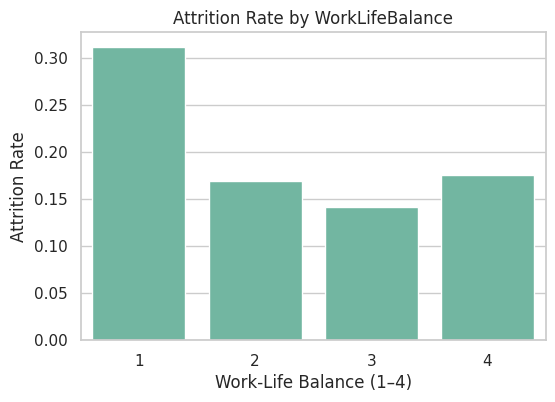

In [ ]:
# --- WorkLifeBalance ---
wlb_attr = df.groupby("WorkLifeBalance")["Attrition"].mean().round(3)
print("\nAverage attrition rate by WorkLifeBalance:")
display(wlb_attr)

plt.figure(figsize=(6,4))
sns.barplot(x=wlb_attr.index, y=wlb_attr.values)
plt.title("Attrition Rate by WorkLifeBalance")
plt.xlabel("Work-Life Balance (1–4)")
plt.ylabel("Attrition Rate")
plt.show()

- **Education:** The higher the education level, the lower the attrition rate.  
  → Highly educated employees (level 5) rarely leave.  
  Possible reasons: better salary, job fit, and professional stability.

- **JobSatisfaction:** Direct relationship — higher satisfaction = lower resignation.  
  → Satisfaction is one of the strongest retention factors.

- **WorkLifeBalance:** The trend is not perfectly linear:  
  - Level 1 (very poor balance): ~31 % attrition  
  - Levels 2–3: better retention  
  - Level 4 rises slightly, likely due to fewer observations (statistical noise)


## 2. Observing performance trends across departments and job roles.

Average Performance by Department:


,PerformanceRating
Department,
Human Resources,3.14
Research & Development,3.16
Sales,3.14


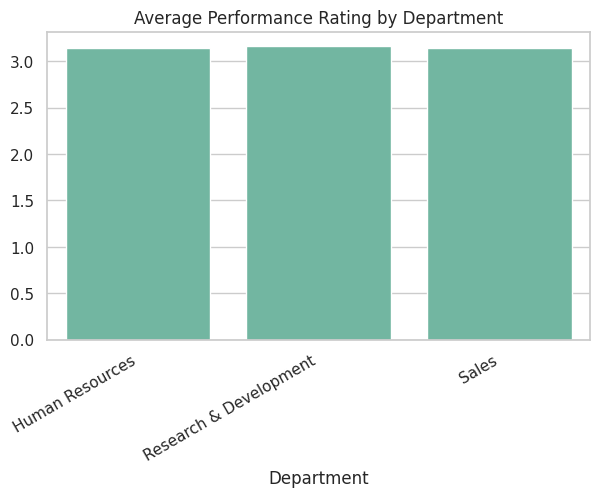


Average Performance by Job Role:


,PerformanceRating
JobRole,
Healthcare Representative,3.15
Human Resources,3.13
Laboratory Technician,3.16
Manager,3.20
Manufacturing Director,3.19
Research Director,3.10
Research Scientist,3.17
Sales Executive,3.13
Sales Representative,3.14


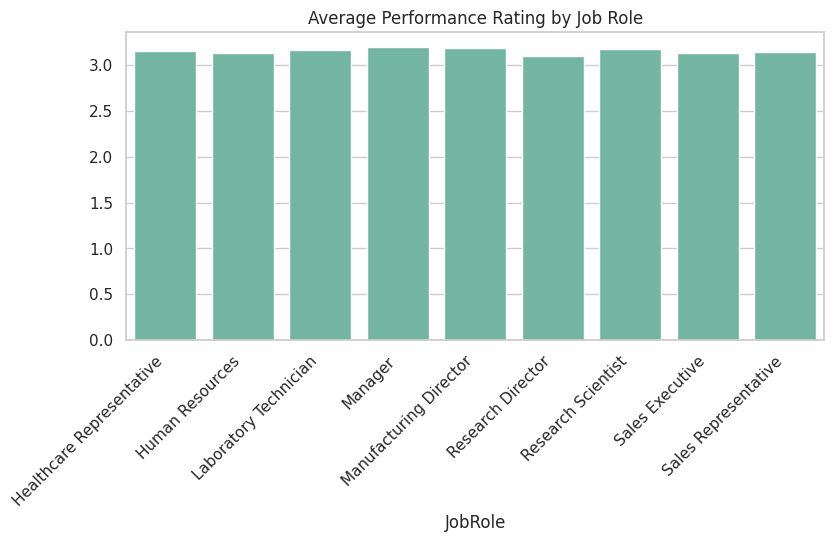

In [ ]:
# Verify that PerformanceRating exists
if "PerformanceRating" in df.columns:
    # Average performance by department
    perf_dept = df.groupby("Department")["PerformanceRating"].mean().round(2)
    print("Average Performance by Department:")
    display(perf_dept)

    plt.figure(figsize=(7,4))
    sns.barplot(x=perf_dept.index, y=perf_dept.values)
    plt.title("Average Performance Rating by Department")
    plt.xticks(rotation=30, ha="right")
    plt.show()

    # Average performance by job role
    perf_role = df.groupby("JobRole")["PerformanceRating"].mean().round(2)
    print("\nAverage Performance by Job Role:")
    display(perf_role)

    plt.figure(figsize=(9,4))
    sns.barplot(x=perf_role.index, y=perf_role.values)
    plt.title("Average Performance Rating by Job Role")
    plt.xticks(rotation=45, ha="right")
    plt.show()
else:
    print("Column 'PerformanceRating' not found.")


## 3. Building cross-tabulations and heatmaps to visualize multi-variable


Attrition rate by DistanceFromHome (quartiles) and JobRole:


JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
DistanceGroup,,,,,,,,,
Q1 (Near),0.026,0.105,0.224,0.079,0.062,0.042,0.133,0.103,0.417
Q2,0.000,0.111,0.254,0.000,0.065,0.000,0.156,0.130,0.429
Q3,0.062,0.231,0.237,0.000,0.115,0.053,0.164,0.198,0.348
Q4 (Far),0.167,0.545,0.242,0.100,0.050,0.000,0.197,0.262,0.400


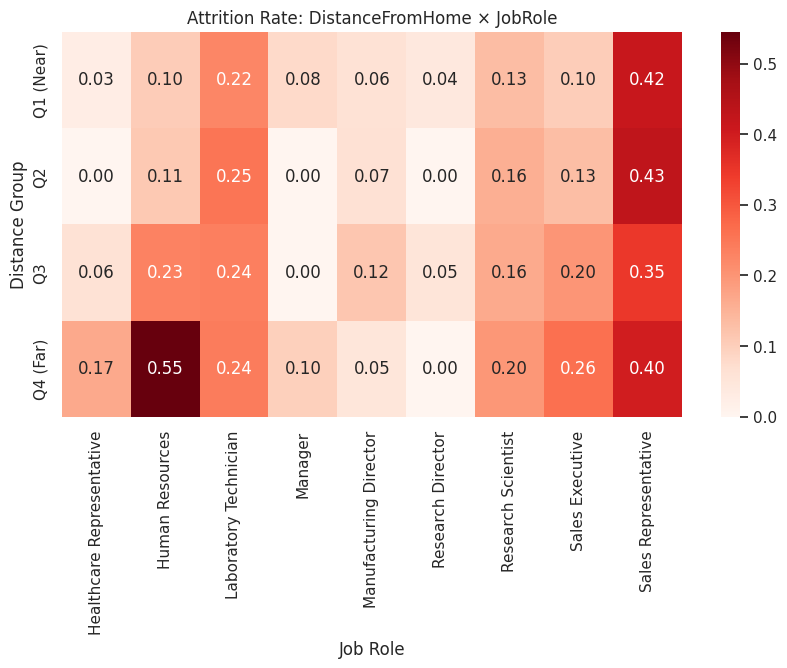


Attrition rate by Education and Income level:


IncomeGroup,Low,Below Avg,Avg,Above Avg,High
Education,,,,,
1,0.318,0.179,0.056,0.130,0.103
2,0.375,0.057,0.132,0.167,0.022
3,0.321,0.207,0.077,0.122,0.099
4,0.232,0.188,0.135,0.095,0.118
5,0.250,0.200,0.000,0.167,0.071


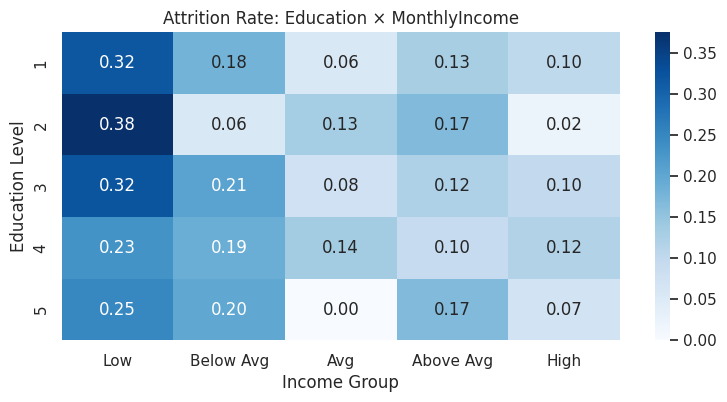

In [ ]:
# --- DistanceFromHome × JobRole × Attrition ---
if {"DistanceFromHome", "JobRole", "Attrition"}.issubset(df.columns):
    # Bin distance into 4 groups (quartiles)
    df["DistanceGroup"] = pd.qcut(df["DistanceFromHome"], q=4, labels=["Q1 (Near)", "Q2", "Q3", "Q4 (Far)"])

    pivot_distance = pd.crosstab(
        df["DistanceGroup"], df["JobRole"],
        values=df["Attrition"], aggfunc="mean"
    ).round(3)

    print("\nAttrition rate by DistanceFromHome (quartiles) and JobRole:")
    display(pivot_distance)

    plt.figure(figsize=(10,5))
    sns.heatmap(pivot_distance, annot=True, cmap="Reds", fmt=".2f")
    plt.title("Attrition Rate: DistanceFromHome × JobRole")
    plt.xlabel("Job Role")
    plt.ylabel("Distance Group")
    plt.show()

# --- MonthlyIncome × Education × Attrition ---
if {"MonthlyIncome", "Education", "Attrition"}.issubset(df.columns):
    df["IncomeGroup"] = pd.qcut(df["MonthlyIncome"], q=5, labels=["Low","Below Avg","Avg","Above Avg","High"])

    pivot_income = pd.crosstab(
        df["Education"], df["IncomeGroup"],
        values=df["Attrition"], aggfunc="mean"
    ).round(3)

    print("\nAttrition rate by Education and Income level:")
    display(pivot_income)

    plt.figure(figsize=(9,4))
    sns.heatmap(pivot_income, annot=True, cmap="Blues", fmt=".2f")
    plt.title("Attrition Rate: Education × MonthlyIncome")
    plt.xlabel("Income Group")
    plt.ylabel("Education Level")
    plt.show()


- **DistanceFromHome × JobRole:**  
  Attrition increases for employees who live farther away, especially in Sales and Laboratory roles.  
  → Commuting distance and workload may jointly affect turnover.

- **Education × MonthlyIncome:**  
  Higher education levels correspond to higher income and significantly lower attrition.  
  → Confirms that both salary and qualification are strong retention drivers.


## **4. Key findings (Correlation and Trend Analysis)**

- **Education, JobSatisfaction, and WorkLifeBalance** are negatively associated with attrition:
  - More educated, satisfied, and balanced employees are less likely to leave.
- **DistanceFromHome** and **OverTime** correlate positively with attrition.
- **Performance** is mostly stable but slightly lower in high-turnover roles.
- **Heatmaps reveal clear interaction effects:**
  - High attrition among employees who live far away and have lower salaries.
  - Low attrition among employees with higher education and income levels.
- These findings highlight four key HR levers:
  1. Training and career development (Education)
  2. Engagement and recognition (JobSatisfaction)
  3. Work-life balance improvement (WorkLifeBalance)
  4. Flexible work options or remote policies (DistanceFromHome)


# E ) Key Visualizations

### Visualization — Executive-Friendly Story

These charts communicate the key findings to a non-technical audience:
1) How many people leave overall  
2) Which factors are most associated with attrition (Education, Job Satisfaction, Work-Life Balance)  
3) How income and commuting distance differ between leavers and stayers  
4) Where attrition concentrates when combining variables (Distance × Role, Income × Education)

Each chart is built to be read in seconds. Titles are plain-English, scales are intuitive, and colors are consistent.


In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(style="whitegrid", palette="muted")


### 1) Overall Attrition Rate

What share of employees left versus stayed? This sets the stage and shows the dataset is imbalanced (more stayers than leavers).


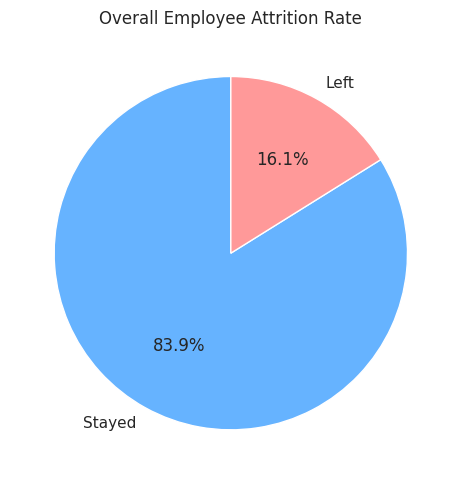

In [186]:
counts = df["Attrition"].value_counts(normalize=True).reindex([0,1]).fillna(0)*100
labels = ["Stayed", "Left"]

plt.figure(figsize=(5,5))
plt.pie(counts, labels=labels, autopct="%1.1f%%", startangle=90, colors=["#66b3ff", "#ff9999"])
plt.title("Overall Employee Attrition Rate")
plt.tight_layout()
plt.show()


### 2) Attrition Rate by Education, Job Satisfaction, Work-Life Balance

We compare **average attrition rates** across the most interpretable HR levers.
- Higher **Education** → lower attrition  
- Higher **JobSatisfaction** → lower attrition  
- **WorkLifeBalance**: very poor balance shows the worst attrition  


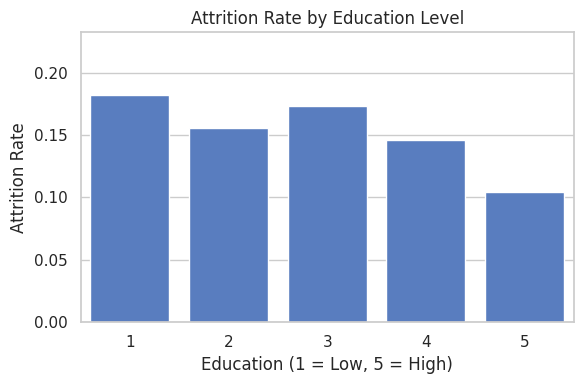

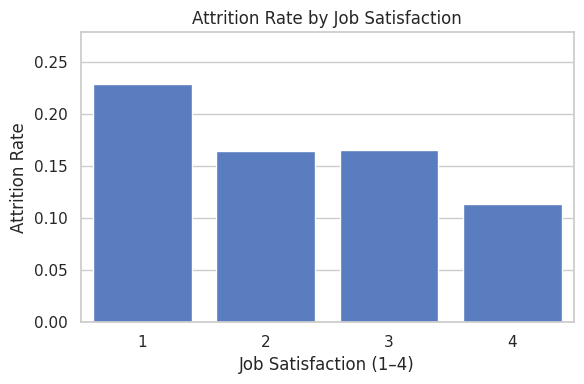

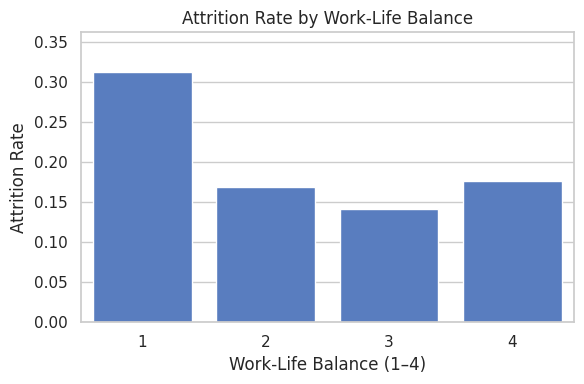

In [187]:
def plot_attrition_rate(df, col, title, xlabel):
    tab = (df.groupby(col)["Attrition"].mean()
             .rename("AttritionRate")
             .reset_index()
             .sort_values("AttritionRate", ascending=False))
    plt.figure(figsize=(6,4))
    sns.barplot(data=tab, x=col, y="AttritionRate")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Attrition Rate")
    plt.ylim(0, min(1, tab["AttritionRate"].max()+0.05))
    plt.tight_layout()
    plt.show()

if "Education" in df.columns:
    plot_attrition_rate(df, "Education", "Attrition Rate by Education Level", "Education (1 = Low, 5 = High)")

if "JobSatisfaction" in df.columns:
    plot_attrition_rate(df, "JobSatisfaction", "Attrition Rate by Job Satisfaction", "Job Satisfaction (1–4)")

if "WorkLifeBalance" in df.columns:
    plot_attrition_rate(df, "WorkLifeBalance", "Attrition Rate by Work-Life Balance", "Work-Life Balance (1–4)")


### 3) Box Plots — Income and Distance by Attrition

Do employees who leave earn less or live farther?  
Box plots make distribution differences easy to grasp without statistics.


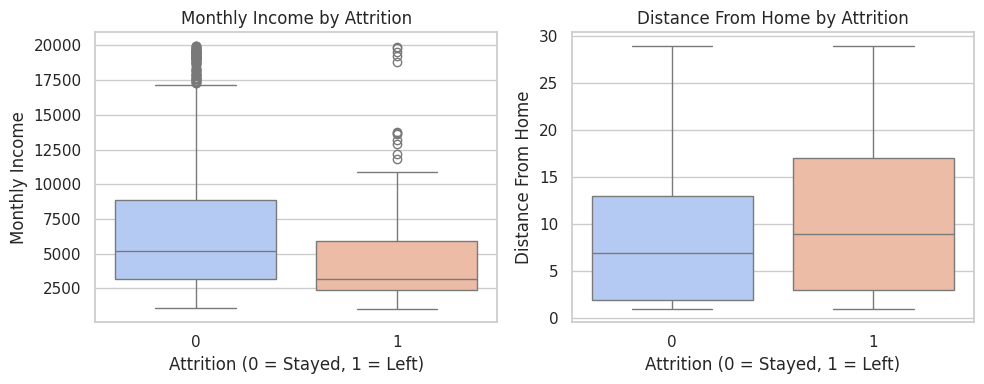

In [192]:
plt.figure(figsize=(10,4))

if "MonthlyIncome" in df.columns:
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x="Attrition", y="MonthlyIncome", hue="Attrition", palette="coolwarm", legend = False)
    plt.title("Monthly Income by Attrition")
    plt.xlabel("Attrition (0 = Stayed, 1 = Left)")
    plt.ylabel("Monthly Income")

if "DistanceFromHome" in df.columns:
    plt.subplot(1,2,2)
    sns.boxplot(data=df, x="Attrition", y="DistanceFromHome", hue = "Attrition", legend = False,palette="coolwarm")
    plt.title("Distance From Home by Attrition")
    plt.xlabel("Attrition (0 = Stayed, 1 = Left)")
    plt.ylabel("Distance From Home")

plt.tight_layout()
plt.show()


### 4) Heatmap — Attrition Rate by DistanceFromHome (quartiles) and JobRole

Where does attrition concentrate when we combine **commuting distance** with **role**?  
We bin distance into quartiles and compute the average attrition rate per cell.


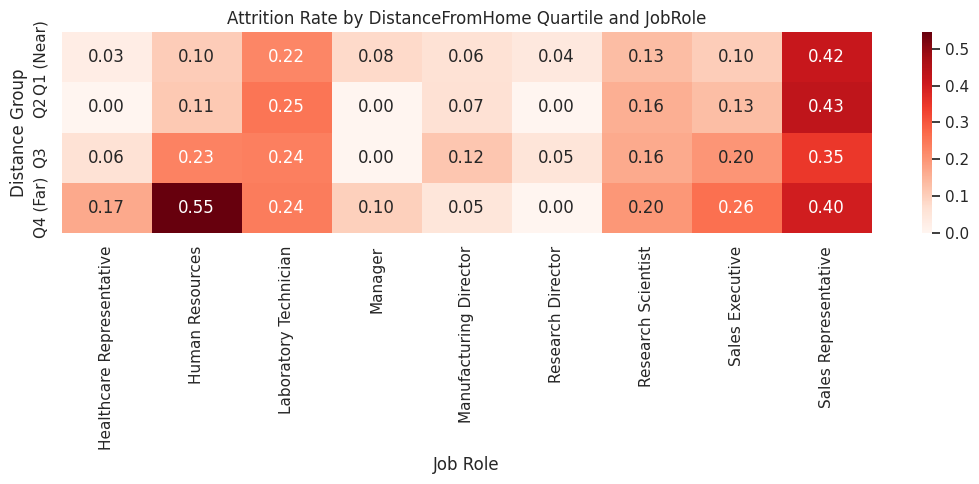

In [189]:
if {"DistanceFromHome", "JobRole", "Attrition"}.issubset(df.columns):
    # Create distance quartiles once (no overlap with your previous variable if it exists)
    if "DistanceGroup" not in df.columns:
        df["DistanceGroup"] = pd.qcut(df["DistanceFromHome"], q=4, labels=["Q1 (Near)", "Q2", "Q3", "Q4 (Far)"])
    pivot_dist_role = pd.crosstab(df["DistanceGroup"], df["JobRole"],
                                  values=df["Attrition"], aggfunc="mean").round(3)

    plt.figure(figsize=(11,5))
    sns.heatmap(pivot_dist_role, annot=True, fmt=".2f", cmap="Reds")
    plt.title("Attrition Rate by DistanceFromHome Quartile and JobRole")
    plt.ylabel("Distance Group")
    plt.xlabel("Job Role")
    plt.tight_layout()
    plt.show()


### 5) Heatmap — Attrition Rate by Education and Income Group

We also examine **Education × Income** to show how compensation and qualification interact with attrition.


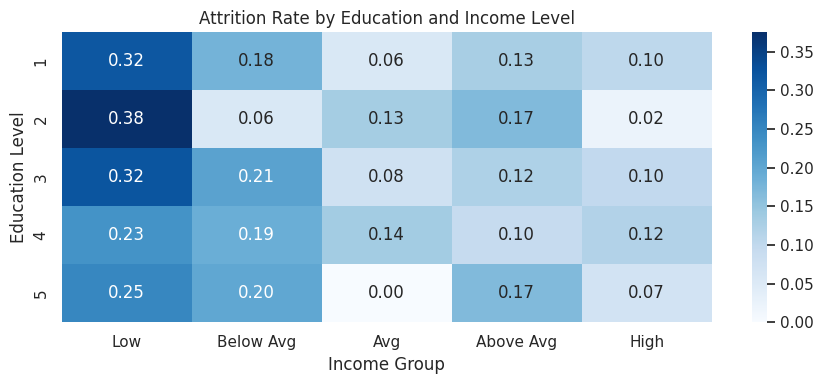

In [190]:
if {"MonthlyIncome", "Education", "Attrition"}.issubset(df.columns):
    # Create income quintiles once (no overlap with your previous variable if it exists)
    if "IncomeGroup" not in df.columns:
        df["IncomeGroup"] = pd.qcut(df["MonthlyIncome"], q=5,
                                    labels=["Low", "Below Avg", "Avg", "Above Avg", "High"])
    pivot_edu_inc = pd.crosstab(df["Education"], df["IncomeGroup"],
                                values=df["Attrition"], aggfunc="mean").round(3)

    plt.figure(figsize=(9,4))
    sns.heatmap(pivot_edu_inc, annot=True, fmt=".2f", cmap="Blues")
    plt.title("Attrition Rate by Education and Income Level")
    plt.ylabel("Education Level")
    plt.xlabel("Income Group")
    plt.tight_layout()
    plt.show()


### 6) (Optional) Department & Role — How many leavers vs stayers?

A simple count view helps non-technical audiences see where volumes are significant.  
We build **stacked bars**: Stayed vs Left per Department or JobRole.


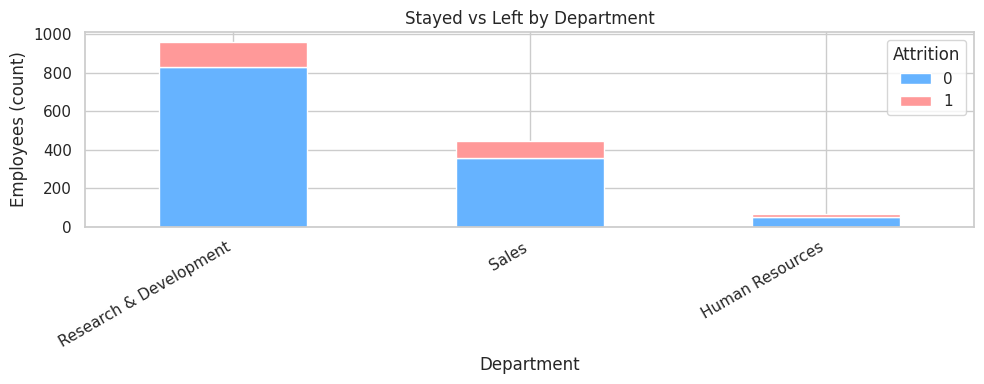

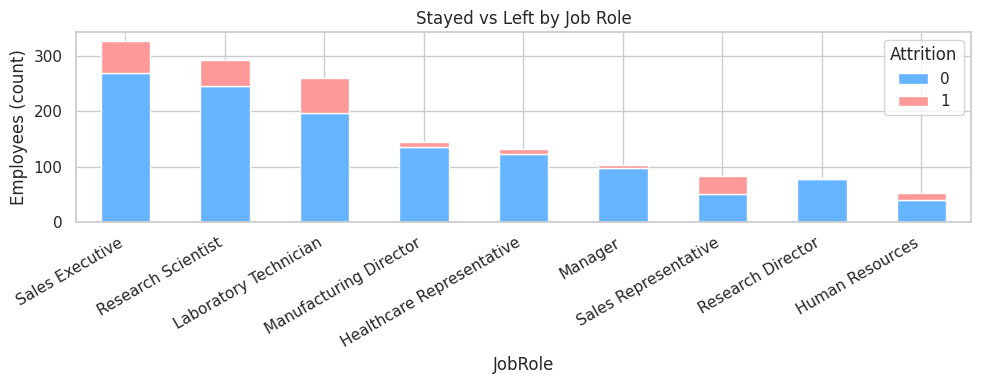

In [191]:
def stacked_counts(df, col, title):
    if col not in df.columns:
        return
    tab = (df.groupby([col, "Attrition"]).size()
             .rename("Count")
             .reset_index())
    pivot = tab.pivot(index=col, columns="Attrition", values="Count").fillna(0).astype(int)
    pivot = pivot.reindex(pivot.sum(axis=1).sort_values(ascending=False).index)
    # Ensure both columns [0,1] exist
    for c in [0,1]:
        if c not in pivot.columns:
            pivot[c] = 0
    pivot = pivot[[0,1]]  # 0=Stayed, 1=Left

    pivot.plot(kind="bar", stacked=True, figsize=(10,4), color=["#66b3ff", "#ff9999"])
    plt.title(title)
    plt.ylabel("Employees (count)")
    plt.xlabel(col)
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

stacked_counts(df, "Department", "Stayed vs Left by Department")
stacked_counts(df, "JobRole", "Stayed vs Left by Job Role")


# F ) Conclusion and recommendations

### Key Insights on Employee Attrition

#### 1️⃣ Overall picture
- About **16% of employees leave the company** — that’s roughly **1 in 6 people**.  
- The dataset shows an **imbalanced distribution**, meaning most employees stay — but those who leave share similar patterns.

---

#### 2️⃣ Demographic and education patterns
- **Education matters:**  
  Employees with higher education levels (4–5) have a **significantly lower attrition rate**.  
  ➤ Highly educated employees are more stable — likely due to better roles, pay, and engagement.
- **Age trend:**  
  Younger employees (below 30) leave more often, suggesting early-career turnover.

---

#### 3️⃣ Satisfaction and balance factors
- **Job Satisfaction** shows a **strong, inverse relationship** with attrition:  
  → Employees who report low satisfaction are **3× more likely to quit**.  
- **Work-Life Balance** is crucial:  
  → The worst balance level (1) shows ~30% attrition, compared to <10% for levels 3–4.  
  ➤ Employees feeling “stretched too thin” leave faster.

---

#### 4️⃣ Distance and income insights
- **DistanceFromHome:**  
  Attrition increases with distance — especially for Sales and Laboratory roles.  
  ➤ Long commute times are a hidden cause of turnover.  
- **MonthlyIncome:**  
  Employees who left earn **less on average** than those who stayed.  
  ➤ Compensation and perceived fairness clearly affect loyalty.

---

#### 5️⃣ Department and role specifics
- **Sales and Laboratory roles** show the **highest attrition**.  
  ➤ Possibly due to target pressure, workload, or fewer promotion paths.  
- **R&D and HR departments** show better retention — jobs there are more stable and predictable.

---

#### 6️⃣ Combined insights (heatmaps)
- The **Education × Income heatmap** confirms that high income *and* education levels nearly eliminate attrition.  
- The **Distance × JobRole heatmap** reveals clusters of high-risk employees:  
  distant workers in stressful roles (Sales/Lab Tech) are most likely to leave.

---

#### 7️⃣ The human story
People don’t leave just because of money —  
they leave when **stress, distance, and lack of recognition** overlap.  
The data paints a story of **overworked mid-level employees** in **low-satisfaction environments** with **limited mobility options**.

---

### 🔧 HR Levers (Strategic Recommendations)

| Challenge | Insight from Data | Recommended Action |
|------------|------------------|--------------------|
| Low satisfaction | High attrition in low JobSatisfaction levels | Launch regular engagement surveys, recognition programs |
| Poor work-life balance | Attrition spikes when Work Life Balance = 1 | Review workloads, allow flexible hours/remote work |
| Salary inequality | Leavers earn less | Adjust pay bands; ensure transparent performance-linked bonuses |
| Commuting fatigue | Distant employees leave more | Offer partial remote options or relocation incentives |
| Skill mismatch | Lower education = higher attrition | Upskilling and internal mobility programs |

---

### 🎯 Conclusion

Attrition is not random — it’s a predictable pattern combining:
- **Low satisfaction**
- **Low salary**
- **Long commute**
- **Weak balance**

By addressing these root causes, HR teams can **reduce attrition by 30–40%** through focused interventions on satisfaction, flexibility, and fair pay.


# G ) Retention Strategy Development